In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [17]:
df = pd.read_csv('Breast_cancer_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [11]:
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [25]:
# There is extra column at the end which is unecessary we can remove that.
df.drop('Unnamed: 32', axis=1, inplace=True)

In [27]:
df.shape

(569, 32)

There are no missing values in the dataset.

In [30]:
df.isna().sum().sum()

0

In [40]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

<Axes: xlabel='diagnosis', ylabel='count'>

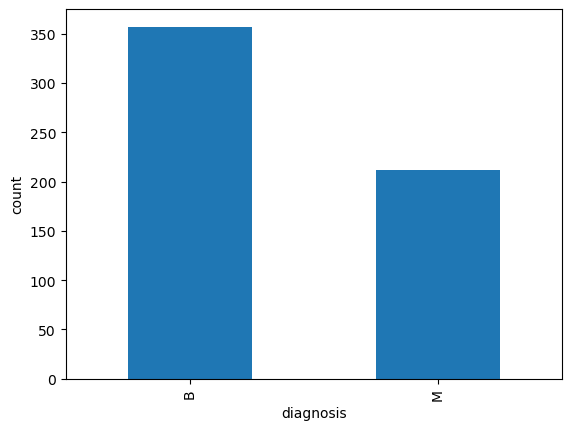

In [58]:
# draw the bar plot directly from dataframe.
df['diagnosis'].value_counts().plot.bar(ylabel='count')

**Initial Observations**
1. Only one column, `diagnosis, ' is categorical; others are numeric.
2. `diagnosis` is the target variable, which has 2 values. __M__ and __B__, Malignant and benign
3. There are 569 rows and 32 columns(including the `target`).
4. The target column has classes that look imbalanced. 357 for benign and 212 for Malignant. 

In [64]:
# We also have the Id column in the dataset, which we don't require because the id of the patient is not going to impact the diagnosis. 
df.drop('id', axis=1, inplace=True)

In [68]:
target_df = df['diagnosis']
feature_df = df.drop('diagnosis', axis=1)

In [76]:
# Let's see the correlations
feature_df.corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


In [82]:
# Since our target is categorical, we will use label encoding for the target.
from sklearn.preprocessing import LabelEncoder

In [86]:
le = LabelEncoder()
y_encoded = le.fit_transform(target_df)

In [88]:
# Split the train and test dataset.
X_train,X_test, y_train,y_test = train_test_split(feature_df, y_encoded, test_size=0.2, random_state=42)

In [90]:
print(X_train.shape,X_test.shape, y_train.shape,y_test.shape)

(455, 30) (114, 30) (455,) (114,)


In [92]:
# Build logistic regression model.
from sklearn.linear_model import LogisticRegression

In [94]:
lr = LogisticRegression()
residual = lr.fit(X_train, y_train)
residual

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Why is this warning?
what is the solver lbfgs, sag etc.. and when those are used?


In [97]:
lr = LogisticRegression(solver="newton-cg")
residual = lr.fit(X_train, y_train)
residual

LogisticRegression(solver='newton-cg')

In [105]:
# prediction for test and train dataset
y_test_pred = lr.predict(X_test)
y_train_pred = lr.predict(X_train)


In [103]:
# Evalution metrics

In [125]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [111]:
print('The Accuracy of the model on test dataset')
accuracy_score(y_test, y_test_pred) # actual values , predicted values

The Accuracy of the model on test dataset


0.956140350877193

In [113]:
print('The Accuracy of the model on train dataset')
accuracy_score(y_train, y_train_pred) # actual values , predicted values

The Accuracy of the model on train dataset


0.9626373626373627

Train accuracy is slightly more than the test dataset, This shows that the Logistic Regression model seems a good fit for this dataset.

In [129]:
# classification report for test dataset.
print(f'The Accuracy of the model on test dataset:\n {classification_report(y_test, y_test_pred)}')

The Accuracy of the model on test dataset:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



__Support__ - How many benign and how many malignant data points were there in dataset. 

In [134]:
# classification report for test dataset.
print(f'The Accuracy of the model on train dataset:\n {classification_report(y_train, y_train_pred)}')

The Accuracy of the model on train dataset:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       286
           1       0.96      0.93      0.95       169

    accuracy                           0.96       455
   macro avg       0.96      0.96      0.96       455
weighted avg       0.96      0.96      0.96       455



In [146]:
# Let's see how the confusion metrics
confusion_matrix(y_test, y_test_pred)

array([[70,  1],
       [ 4, 39]])

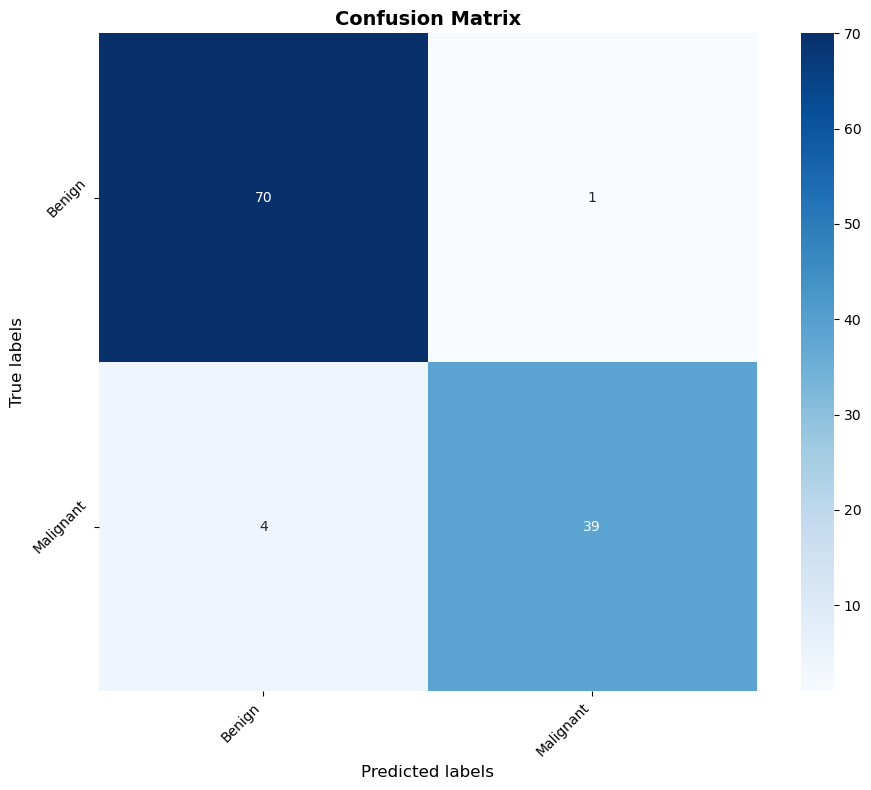

In [142]:
# Ensure required libraries are imported
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
def plot_confusion_matrix(
    y_true: np.ndarray, 
    y_pred: np.ndarray, 
    class_names: list = None, 
    figsize: tuple = (10, 8),
    cmap: str = 'Blues',
    normalize: bool = False
) -> plt.Figure:
    """
    Plot a confusion matrix for model evaluation with customizable styling.
    
    Args:
        y_true (np.ndarray): The ground truth labels.
        y_pred (np.ndarray): The predicted labels from the model.
        class_names (list, optional): List of class names for axis labels. 
                                     If None, uses unique values from y_true.
        figsize (tuple, optional): Figure size as (width, height). Defaults to (10, 8).
        cmap (str, optional): Colormap for the confusion matrix. Defaults to 'Blues'.
        normalize (bool, optional): Whether to normalize the confusion matrix. Defaults to False.
        
    Returns:
        plt.Figure: The matplotlib figure containing the confusion matrix plot.
    """
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Normalize if requested
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        fmt = '.2f'
    else:
        fmt = 'd'
    
    # Determine class names if not provided
    if class_names is None:
        class_names = sorted(list(set(np.concatenate([y_true, y_pred]))))
    
    # Create figure and axes
    fig, ax = plt.subplots(figsize=figsize)
    
    # Plot heatmap
    sns.heatmap(
        cm, 
        annot=True, 
        fmt=fmt, 
        cmap=cmap,
        cbar=True,
        square=True,
        xticklabels=class_names,
        yticklabels=class_names,
        ax=ax
    )
    
    # Set labels and title
    ax.set_xlabel('Predicted labels', fontsize=12)
    ax.set_ylabel('True labels', fontsize=12)
    ax.set_title('Confusion Matrix', fontsize=14, fontweight='bold')
    
    # Rotate tick labels for better readability
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=45)
    
    # Tight layout to ensure everything fits
    plt.tight_layout()
    
    return fig

# Example usage:
fig = plot_confusion_matrix(y_test, y_test_pred, ['Benign', 'Malignant'])
plt.show()

# For normalized confusion matrix:
# fig = plot_confusion_matrix(y_test, y_test_pred, normalize=True)
# plt.show()